# [Modelo] Segmentación K-Means

### Caso:
En una entidad bancaria existen varios canales de comunicación tales como: ATM, Oficinas, IVR, Banca por internet-Móvil, etc.
Sin embargo, al realizar las comunicaciones de ofertas a los clientes de dicha entidad bancaria, el cliente recibe diversas ofertas de distintos canales sin saber si les da importancia o no, por lo que ya interviene un gasto por parte de la entidad, ya que, realiza alianzas estratégicas de campaña.


Por tanto: Se requiere identificar cuál sería el medio de comunicación preferido para los clientes y así enviarles ofertas, advertencia, recordatorios, etc. más direccionadas.

[Pizarra](https://docs.google.com/spreadsheets/d/1rkU2Ts5aZt0pzMvo-kvsTgw-45Vjd8auGWNyv58DqaA/edit#gid=1240007672)

### 1. Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para los graficos tengan las mismas dimensiones
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4)
plt.style.use('ggplot')

pd.options.display.max_columns = None #Para que se visualicen todas las variables
import os

### 2. Extracción Base de datos

In [2]:
from google.colab import drive
drive.mount('/gdrive')
#Repositorios
path = '/gdrive/MyDrive/Machine Learning Journey/Data_repository'
filename = "01dataBaseMulti.txt"
fullpath = os.path.join(path, filename)

Mounted at /gdrive


In [3]:
# #Repositorios
# path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/DMC/Machine Learning/ML No Supervisado'
# filename = "01dataBaseMulti.txt"
# fullpath = os.path.join(path, filename)

In [4]:
dataFrame = pd.read_csv(fullpath,delimiter='|')
dataFrame.head()

,cliente,edad,ingreso,sexo,flgLimaprov,trxAplus,trxAtm,trxBcaex,trxBm,trxBxi,trxIvr,trxPostc,trxPostd,trxSalex,trxSbt,trxVent,trx
0,28,[7. > 55],[1. <=700],M,1,0.0,10.0,0.0,43.0,5.0,0.0,0.0,1.0,29.0,1.0,2.0,91
1,44,[7. > 55],[8. > 8000],M,1,0.0,125.0,0.0,0.0,1679.0,0.0,76.0,21.0,0.0,11.0,6.0,1918
2,63,[7. > 55],[3. <=2500],F,1,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,26
3,70,[7. > 55],[8. > 8000],M,1,0.0,359.0,18.0,0.0,0.0,0.0,0.0,175.0,17.0,8.0,32.0,609
4,77,[7. > 55],[4. <=3500],M,1,0.0,8.0,0.0,0.0,23.0,7.0,111.0,0.0,2.0,7.0,12.0,170


In [5]:
print("Número de filas: " + str(dataFrame.shape[0]))
print("Número de columnas: " + str(dataFrame.shape[1]))

Número de filas: 40000
Número de columnas: 17


In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente      40000 non-null  int64  
 1   edad         39875 non-null  object 
 2   ingreso      37020 non-null  object 
 3   sexo         39999 non-null  object 
 4   flgLimaprov  40000 non-null  int64  
 5   trxAplus     40000 non-null  float64
 6   trxAtm       40000 non-null  float64
 7   trxBcaex     40000 non-null  float64
 8   trxBm        40000 non-null  float64
 9   trxBxi       40000 non-null  float64
 10  trxIvr       40000 non-null  float64
 11  trxPostc     40000 non-null  float64
 12  trxPostd     40000 non-null  float64
 13  trxSalex     40000 non-null  float64
 14  trxSbt       40000 non-null  float64
 15  trxVent      40000 non-null  float64
 16  trx          40000 non-null  int64  
dtypes: float64(11), int64(3), object(3)
memory usage: 5.2+ MB


In [7]:
# Para usar el K-means, las variables deben ser numericas

### 3. Metodología

In [8]:
#### 3.1 Análisis Previo (objetivo)
#### 3.2 Exploración (descriptivo, grafico barras,cajas)
#### 3.3 Transformación (standarización,cajas)
#### 3.4 Outliers (analisis y eliminación de outliers)
#### 3.5 Dimensionamiento (PCA)
#### 3.6 Modelamiento
#### 3.7 Evaluación
#### 3.8 Perfilamiento
#### 3.9 Visualización

In [9]:
# Variables objetivo de estudio:
channelName = ['trxAplus', 'trxBcaex', 'trxSalex', 'trxBm', 'trxBxi', 'trxIvr', 'trxSbt', 'trxVent',
               'trxAtm','trxPostc', 'trxPostd']

In [10]:
channelName

['trxAplus',
 'trxBcaex',
 'trxSalex',
 'trxBm',
 'trxBxi',
 'trxIvr',
 'trxSbt',
 'trxVent',
 'trxAtm',
 'trxPostc',
 'trxPostd']

#### 3.1 Análisis Negocio

El dataset ya se encuentra trabajado a nivel de cliente con sus respectivas variables, se consideraron filtros de criterios de autoasignados, distribución histórica de transacciones, etc.

#### 3.2 Exploración

In [11]:
dataFrame[channelName].describe().T

,count,mean,std,min,25%,50%,75%,max
trxAplus,40000.0,0.692650,6.230518,0.0,0.0,0.0,0.0,762.0
trxBcaex,40000.0,4.509275,11.050313,0.0,0.0,0.0,4.0,434.0
trxSalex,40000.0,3.303575,10.898933,0.0,0.0,0.0,2.0,523.0
trxBm,40000.0,227.731450,802.171156,0.0,0.0,0.0,14.0,21210.0
trxBxi,40000.0,128.066375,552.384436,0.0,0.0,0.0,32.0,65309.0
trxIvr,40000.0,3.956700,15.673606,0.0,0.0,0.0,2.0,772.0
trxSbt,40000.0,3.364375,6.738015,0.0,0.0,1.0,4.0,162.0
trxVent,40000.0,2.865125,8.973881,0.0,0.0,1.0,3.0,884.0
trxAtm,40000.0,62.573200,68.091926,0.0,15.0,41.0,88.0,1296.0
trxPostc,40000.0,5.897150,33.659851,0.0,0.0,0.0,0.0,1339.0


In [12]:
# Una variable que tenga mucha variabilidad no siempre es critico, en algunos casos nos podria ayudar. (el modelo va a tomar comportamiento diferente)

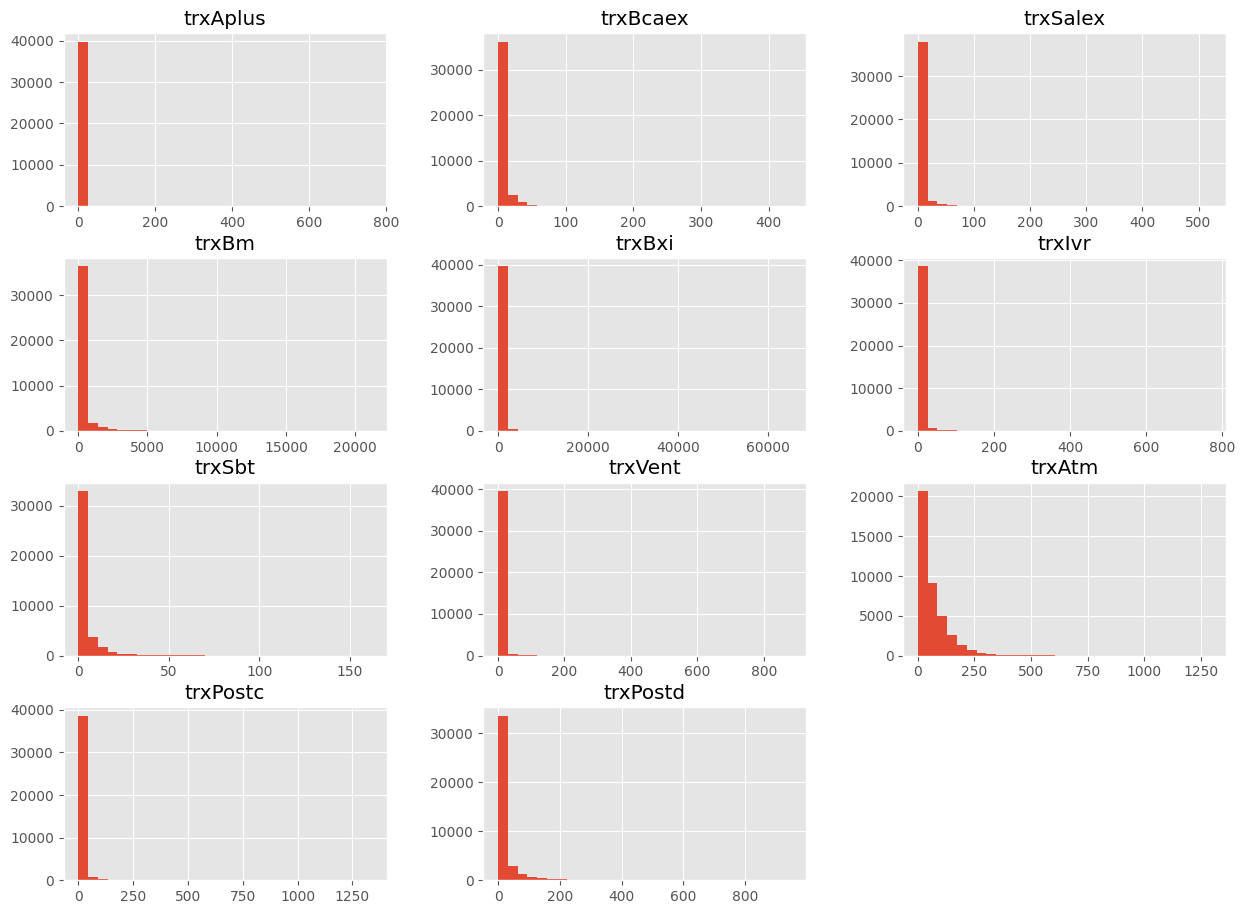

In [13]:
dataFrame[channelName].hist(bins = 30, figsize=(15,11))
plt.show()

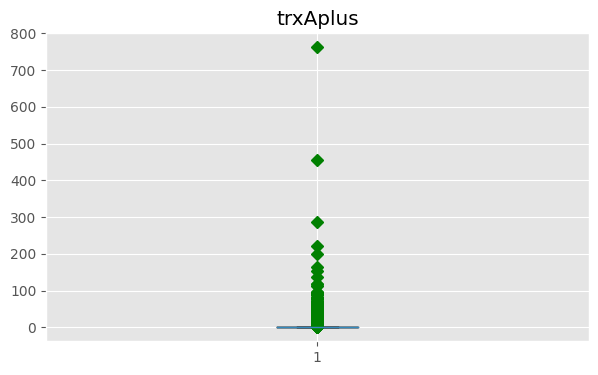

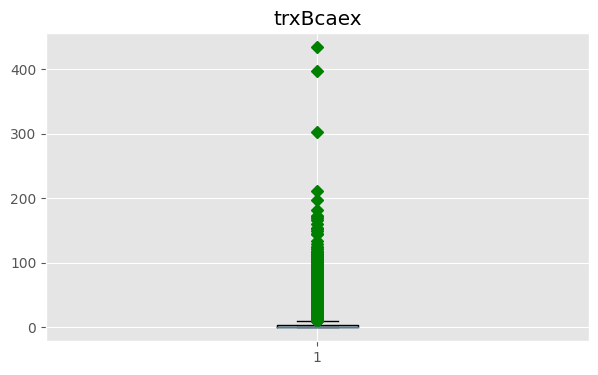

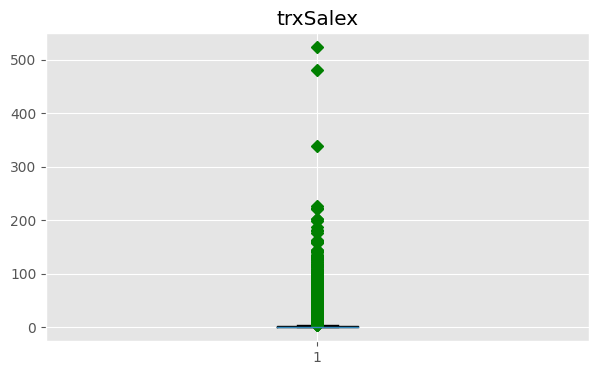

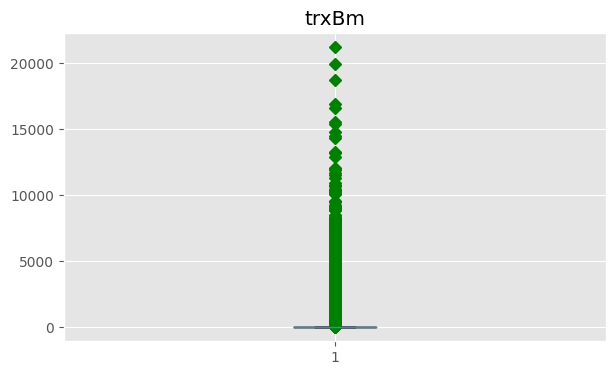

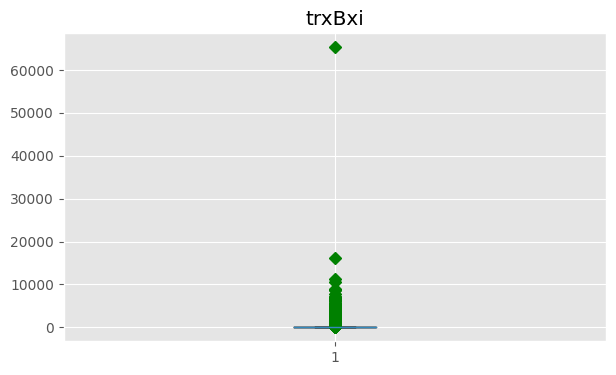

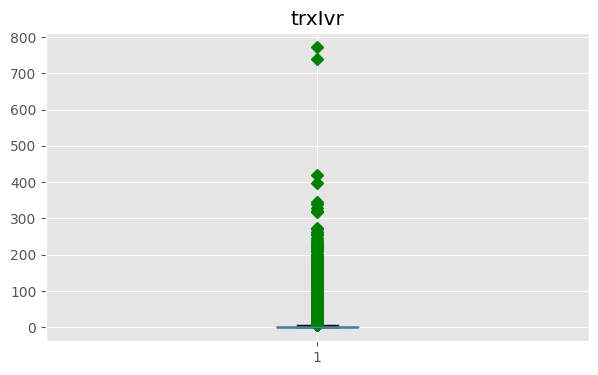

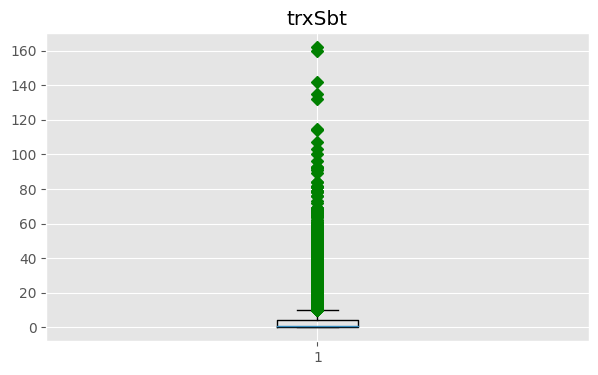

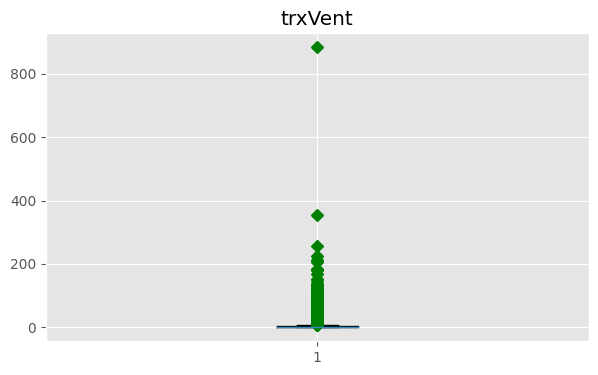

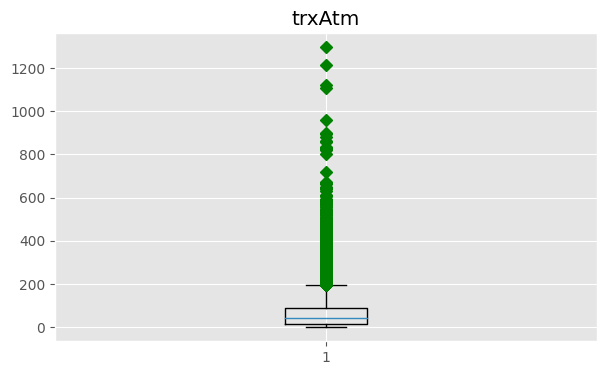

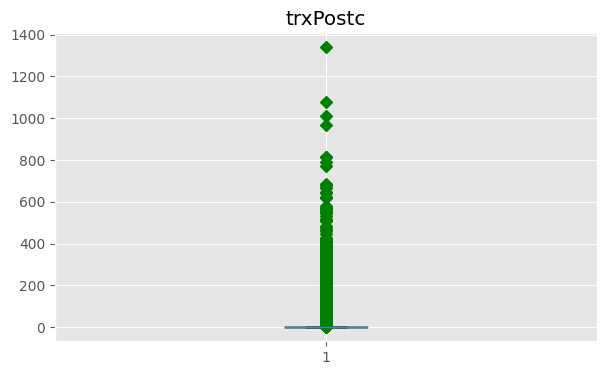

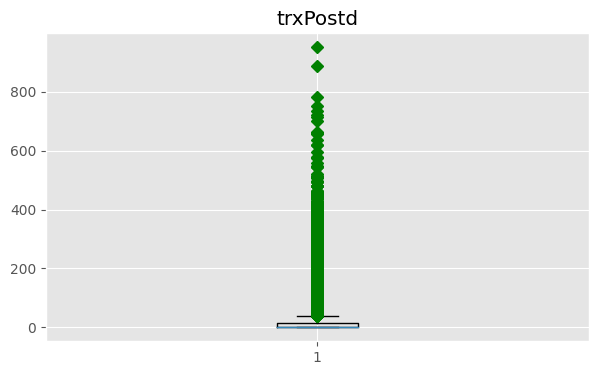

In [14]:
# Gráfico de cajas por variable en estudio:
for columnName in channelName:
    plt.title(columnName)
    plt.boxplot(dataFrame[columnName], 0, 'gD')
    plt.show()

#### 3.3 Transformación

In [15]:
# ------------------------------
# Creamos el objeto para escalar
# ------------------------------
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()    #porcentaje [0-1]
#scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))  # (valor - min) / (max-min)

# ************
# Lo aplicamos
# ************
for columnName in channelName:
    dataFrame[columnName] = scaler.fit_transform(dataFrame[columnName].values.reshape(-1, 1))

#for columnName in columName:
#    dataFrame[columnName] = dataFrame[columnName]/dataFrame['trx']

In [16]:
dataFrame[channelName].head()

,trxAplus,trxBcaex,trxSalex,trxBm,trxBxi,trxIvr,trxSbt,trxVent,trxAtm,trxPostc,trxPostd
0,-0.111172,-0.408073,2.357730,-0.230292,-0.222794,-0.252447,-0.350905,-0.096406,-0.772101,-0.175201,-0.386416
1,-0.111172,-0.408073,-0.303114,-0.283897,2.807742,-0.252447,1.133230,0.349338,0.916813,2.082711,0.048314
2,-0.111172,-0.408073,-0.119607,-0.283897,-0.231846,-0.252447,-0.499319,-0.319278,-0.566494,-0.175201,-0.408153
3,-0.111172,1.220861,1.256691,-0.283897,-0.231846,-0.252447,0.687989,3.246671,4.353387,-0.175201,3.395742
4,-0.111172,-0.408073,-0.119607,-0.283897,-0.190208,0.194170,0.539576,1.017953,-0.801474,3.122538,-0.408153


In [17]:
# Para el cliente 3, el valor 4.353387 podria ser considerado un outlier

#### 3.4 Outliers

In [18]:
# Cálculo de intervalo del diagrama de cajas - Método de Rango Intercuartílico
#def calculateNumOutliars(serie):
#  Q01 = serie.quantile(0.25)
#  Q03 = serie.quantile(0.75)
#  IQR = Q03 - Q01
#  a = (serie < (Q01 - 1.5 * IQR)) | (serie > (Q03 + 1.5 * IQR))
#  numOutliars = a[a == True].shape[0]
#  return numOutliars

In [19]:
# Usamos el método de Z-score (considerando se distribuye Normalmente) --- para grandes volúmenes de datos
# Con este metodo, de la transformacion previa identificaremos cuales son outliers
def calculateNumOutliars(serie):
    mu = serie.mean()
    desv = np.std(serie)
    a = ((serie-mu)/desv < -2) | ((serie-mu)/desv > 2)    # Intervalo de confianza al 95% (seria 1.95 aprox)
    numOutliars = a[a == True].shape[0]
    return a,numOutliars

In [20]:
numTotal = dataFrame.shape[0]
for columnName in channelName:
    a,numOutliars = calculateNumOutliars(dataFrame[columnName])
    # Creamos nuevos campos para filtrar los Outliers
    dataFrame['flg_'+columnName]=a
    print('*'+columnName)
    if numOutliars > 0:
      print("Número de valores outliars: " + str(numOutliars))
      print("Porcentaje: " + str(np.round(numOutliars * 100 / numTotal, 2)) + "%")
    else:
      print("****No hay Outliers")
    print("\n")

*trxAplus
Número de valores outliars: 486
Porcentaje: 1.22%


*trxBcaex
Número de valores outliars: 1626
Porcentaje: 4.07%


*trxSalex
Número de valores outliars: 1245
Porcentaje: 3.11%


*trxBm
Número de valores outliars: 1438
Porcentaje: 3.6%


*trxBxi
Número de valores outliars: 1078
Porcentaje: 2.7%


*trxIvr
Número de valores outliars: 976
Porcentaje: 2.44%


*trxSbt
Número de valores outliars: 1597
Porcentaje: 3.99%


*trxVent
Número de valores outliars: 879
Porcentaje: 2.2%


*trxAtm
Número de valores outliars: 1734
Porcentaje: 4.34%


*trxPostc
Número de valores outliars: 903
Porcentaje: 2.26%


*trxPostd
Número de valores outliars: 1671
Porcentaje: 4.18%




In [21]:
# Si despues de hacer la transformacion y la identificacion de outliers, encontramos
# variables con mas de 7% de outliers, se podria considerar eliminar la variable

In [22]:
dataFrame.head()

,cliente,edad,ingreso,sexo,flgLimaprov,trxAplus,trxAtm,trxBcaex,trxBm,trxBxi,trxIvr,trxPostc,trxPostd,trxSalex,trxSbt,trxVent,trx,flg_trxAplus,flg_trxBcaex,flg_trxSalex,flg_trxBm,flg_trxBxi,flg_trxIvr,flg_trxSbt,flg_trxVent,flg_trxAtm,flg_trxPostc,flg_trxPostd
0,28,[7. > 55],[1. <=700],M,1,-0.111172,-0.772101,-0.408073,-0.230292,-0.222794,-0.252447,-0.175201,-0.386416,2.357730,-0.350905,-0.096406,91,False,False,True,False,False,False,False,False,False,False,False
1,44,[7. > 55],[8. > 8000],M,1,-0.111172,0.916813,-0.408073,-0.283897,2.807742,-0.252447,2.082711,0.048314,-0.303114,1.133230,0.349338,1918,False,False,False,False,True,False,False,False,False,True,False
2,63,[7. > 55],[3. <=2500],F,1,-0.111172,-0.566494,-0.408073,-0.283897,-0.231846,-0.252447,-0.175201,-0.408153,-0.119607,-0.499319,-0.319278,26,False,False,False,False,False,False,False,False,False,False,False
3,70,[7. > 55],[8. > 8000],M,1,-0.111172,4.353387,1.220861,-0.283897,-0.231846,-0.252447,-0.175201,3.395742,1.256691,0.687989,3.246671,609,False,False,False,False,False,False,False,True,True,False,True
4,77,[7. > 55],[4. <=3500],M,1,-0.111172,-0.801474,-0.408073,-0.283897,-0.190208,0.194170,3.122538,-0.408153,-0.119607,0.539576,1.017953,170,False,False,False,False,False,False,False,False,False,True,False


In [23]:
# ************************
# Extrayendo los Outliers
# ************************
# Luego que cada variable tenga menos del 10% de Outlier, se filtra de manera Multivariada (este filtro podría ser
# considerado como un segmento Heavy)

# [Solución]
dataFrame = dataFrame[(dataFrame['flg_trxAplus']==False)&
                      (dataFrame['flg_trxBcaex']==False)&
                      (dataFrame['flg_trxSalex']==False)&
                      (dataFrame['flg_trxBm']==False)&
                      (dataFrame['flg_trxBxi']==False)&
                      (dataFrame['flg_trxIvr']==False)&
                      (dataFrame['flg_trxSbt']==False)&
                      (dataFrame['flg_trxVent']==False)&
                      (dataFrame['flg_trxAtm']==False)&
                      (dataFrame['flg_trxPostc']==False)&
                      (dataFrame['flg_trxPostd']==False)]
print('Cantidad de registros sin outliers: '+ str(dataFrame.shape[0]))
dataFrame[channelName].head()

Cantidad de registros sin outliers: 30960


,trxAplus,trxBcaex,trxSalex,trxBm,trxBxi,trxIvr,trxSbt,trxVent,trxAtm,trxPostc,trxPostd
2,-0.111172,-0.408073,-0.119607,-0.283897,-0.231846,-0.252447,-0.499319,-0.319278,-0.566494,-0.175201,-0.408153
6,-0.111172,-0.408073,0.155653,-0.283897,-0.231846,-0.188644,0.539576,-0.096406,-0.801474,-0.175201,-0.408153
7,-0.111172,-0.408073,-0.303114,-0.283897,-0.231846,-0.252447,-0.499319,-0.319278,-0.404946,-0.175201,-0.408153
8,-0.111172,0.677883,-0.211360,-0.283897,-0.186587,-0.252447,-0.499319,-0.319278,-0.581180,-0.175201,0.309153
10,-0.111172,-0.408073,-0.303114,-0.283897,-0.231846,-0.252447,-0.499319,0.015030,-0.566494,-0.175201,-0.408153


In [24]:
dataFrame.head()

,cliente,edad,ingreso,sexo,flgLimaprov,trxAplus,trxAtm,trxBcaex,trxBm,trxBxi,trxIvr,trxPostc,trxPostd,trxSalex,trxSbt,trxVent,trx,flg_trxAplus,flg_trxBcaex,flg_trxSalex,flg_trxBm,flg_trxBxi,flg_trxIvr,flg_trxSbt,flg_trxVent,flg_trxAtm,flg_trxPostc,flg_trxPostd
2,63,[7. > 55],[3. <=2500],F,1,-0.111172,-0.566494,-0.408073,-0.283897,-0.231846,-0.252447,-0.175201,-0.408153,-0.119607,-0.499319,-0.319278,26,False,False,False,False,False,False,False,False,False,False,False
6,88,[7. > 55],[1. <=700],F,1,-0.111172,-0.801474,-0.408073,-0.283897,-0.231846,-0.188644,-0.175201,-0.408153,0.155653,0.539576,-0.096406,23,False,False,False,False,False,False,False,False,False,False,False
7,115,[7. > 55],[2. <=1500],M,1,-0.111172,-0.404946,-0.408073,-0.283897,-0.231846,-0.252447,-0.175201,-0.408153,-0.303114,-0.499319,-0.319278,35,False,False,False,False,False,False,False,False,False,False,False
8,135,[7. > 55],[2. <=1500],F,1,-0.111172,-0.581180,0.677883,-0.283897,-0.186587,-0.252447,-0.175201,0.309153,-0.211360,-0.499319,-0.319278,94,False,False,False,False,False,False,False,False,False,False,False
10,157,[6. <=55],[4. <=3500],M,1,-0.111172,-0.566494,-0.408073,-0.283897,-0.231846,-0.252447,-0.175201,-0.408153,-0.303114,-0.499319,0.015030,27,False,False,False,False,False,False,False,False,False,False,False


In [25]:
# Nos estamos quedando con los clientes que cumplen tener valores sin outliers
dataFrame.shape

(30960, 28)

#### 3.5 Reducción de dimensión (PCA)

In [26]:
# Calculamos el máximo número de componentes (Nro variables = Nro máximo de componentes)
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(dataFrame[channelName])
pca.explained_variance_ratio_

array([0.30564521, 0.13736922, 0.12949776, 0.09655025, 0.08325203,
       0.07221195, 0.05223163, 0.03985631, 0.03643085, 0.02781382,
       0.01914098])

% Var. explicada (1 componentes):  30.564521467766365
% Var. explicada (2 componentes):  44.30144313020576
% Var. explicada (3 componentes):  57.251218638562165
% Var. explicada (4 componentes):  66.90624386678637
% Var. explicada (5 componentes):  75.23144711394995
% Var. explicada (6 componentes):  82.45264249542876
% Var. explicada (7 componentes):  87.67580500187056
% Var. explicada (8 componentes):  91.66143610128998
% Var. explicada (9 componentes):  95.3045206695835
% Var. explicada (10 componentes):  98.08590223198607
% Var. explicada (11 componentes):  99.99999999999997


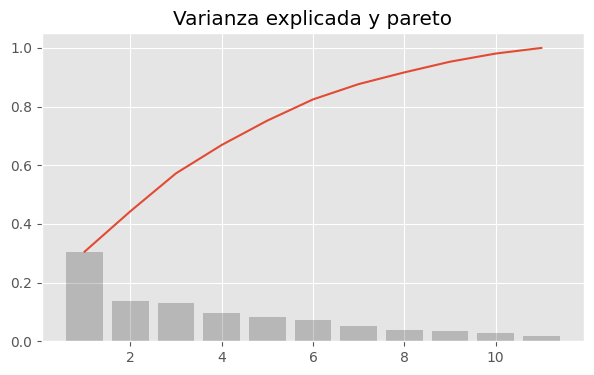

In [27]:
for i in range(len(pca.components_)):
    print('% Var. explicada ('+str(i+1)+' componentes): ', np.cumsum(pca.explained_variance_ratio_)[i]*100)

plt.bar(range(1,len(pca.components_)+1),pca.explained_variance_ratio_, alpha=.2,color='0')
plt.plot(range(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_),alpha=1)
plt.title("Varianza explicada y pareto")
plt.show()

Según el gráfico podemos observar que hay tendencia a que cada componente aporta información relevante, por lo que no existe alguna relación fuerte entre variables

In [28]:
# Elegimos la componente adecuada:
pcaFin = PCA(n_components=11)
pcaFin.fit(dataFrame[channelName])
pd.DataFrame(pcaFin.components_,columns=channelName)

,trxAplus,trxBcaex,trxSalex,trxBm,trxBxi,trxIvr,trxSbt,trxVent,trxAtm,trxPostc,trxPostd
0,0.017197,0.214745,0.064914,0.121618,0.092254,0.068214,0.169643,0.043055,0.895911,0.001663,0.296866
1,0.042413,-0.289226,0.065862,0.182491,0.173392,0.243352,0.818792,0.181500,-0.209804,0.137599,0.145977
2,0.022654,0.907698,0.068777,0.106610,0.020813,0.123338,0.221439,-0.144851,-0.266389,0.005785,-0.053071
3,0.018294,0.088494,0.673840,-0.242339,-0.107943,-0.021009,-0.036974,0.644428,0.025103,-0.002910,-0.222843
4,-0.019084,0.000136,0.295885,0.486095,0.216431,-0.146577,-0.335836,0.118841,-0.253902,-0.023015,0.644645
5,-0.002111,0.168019,-0.659196,0.103627,0.081161,-0.058627,-0.078128,0.713679,-0.029976,0.011076,0.000065
6,0.007806,-0.079755,0.077330,0.795103,-0.220550,-0.049107,-0.024436,-0.001942,0.115192,-0.001407,-0.538965
7,0.060783,0.022809,0.055909,-0.037325,0.747116,-0.566165,0.082379,-0.070161,0.046702,0.100889,-0.297442
8,-0.059493,-0.048586,0.034824,0.033359,0.534144,0.750295,-0.307916,0.007747,0.020557,-0.070774,-0.207892
9,0.984053,-0.012887,-0.014915,-0.001658,-0.023651,0.073271,-0.093950,-0.011357,-0.005306,0.126620,0.017411


Confirmamos nuestra evidencia en el gráfico de Pareto, donde: Para cada variable está asignado a cada Componente, Por tanto no existe reducción de dimensiones para nuestro estudio de canales de transacción

[Analisis](https://docs.google.com/spreadsheets/d/1O8d_qPjevRCFdmKi8CEbEvOGrkea2PBbep4zBVXPdW0/edit#gid=669822839)

#### 3.6 Modelamiento

In [29]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min   #Metricas de distancias

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set t

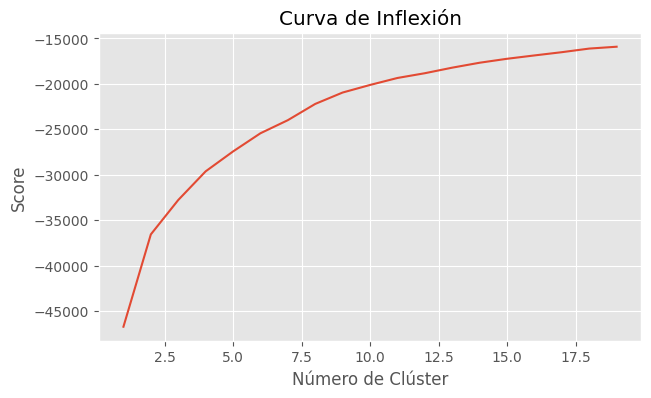

In [30]:
# Calculando el número de clúster adecuado:
X = dataFrame[channelName]

numClus = range(1, 20)    #Debemos colocar un rango para poder probar la cantidad de clusters
kmeans = [KMeans(n_clusters=i,max_iter=600, algorithm = 'auto') for i in numClus]   # algorithm = 'auto' ==> Eucliniana
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]    #Distancia interna
score
plt.plot(numClus,score)
plt.xlabel('Número de Clúster')
plt.ylabel('Score')
plt.title('Curva de Inflexión')
plt.show()

In [31]:
# Observamos que no hay un quiebre significativo
# Cuando pase este tipo de eventos, debemos analizar la distancia (interna (inercia) y externa) y la silueta
# Se busca menor distancia interna (inercia) y mayor silueta

In [32]:
# Nos fijamos de los indicadores de clustering:

ctdDf = int(0.1*dataFrame.shape[0])
cluster = [kmeans[i].predict(X) for i in range(len(kmeans))]

for i in range(1,11):
    print(str(i+1)+' clústeres:')
    print('Inercia: '+str(kmeans[i].inertia_))
    print('Silueta: '+str(metrics.silhouette_score(X, cluster[i], metric='euclidean',sample_size=ctdDf)))
    print("\n")

2 clústeres:
Inercia: 36547.38081100883
Silueta: 0.34767382103482125


3 clústeres:
Inercia: 32767.42511771798
Silueta: 0.33133294611403297


4 clústeres:
Inercia: 29616.103266735765
Silueta: 0.32519544495372654


5 clústeres:
Inercia: 27428.868463236766
Silueta: 0.34310008285651117


6 clústeres:
Inercia: 25428.627460958785
Silueta: 0.3152569918029056


7 clústeres:
Inercia: 23988.6814911397
Silueta: 0.24103549642966535


8 clústeres:
Inercia: 22201.900521767977
Silueta: 0.26386656366168576


9 clústeres:
Inercia: 20948.857116426374
Silueta: 0.26198030368458586


10 clústeres:
Inercia: 20116.61557059455
Silueta: 0.26458905343995276


11 clústeres:
Inercia: 19349.077964757504
Silueta: 0.260791973951008




In [33]:
# Podemos ver que seria con 4, 5 o 6 clusters

In [34]:
# Qué pasaría si consideramos los outlier?
# Qué conclusión proponen?

# [Solución]

Visualizando los grupos en 2-D para tener alguna noción de como se agrupan, en esta ocasión probaremos distintos par de variables

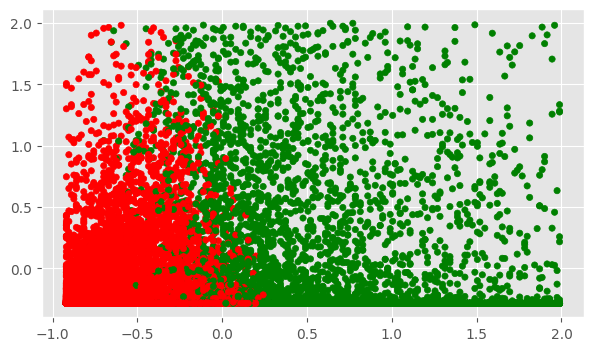

In [35]:
fig = plt.figure()
f1 = dataFrame['trxAtm'].values
f2 = dataFrame['trxBm'].values

#colores=['red','green','blue','cyan','yellow']
colores=['red','green','blue']
asignar=[]
for row in cluster[1]:    # Es decir para dos clusters
    asignar.append(colores[row])

plt.scatter(f1, f2, c=asignar, s=20)
#plt.scatter(centroide[2][:, 0], centroide[2][:, 1], marker='*', c='yellow', s=100)
plt.show()

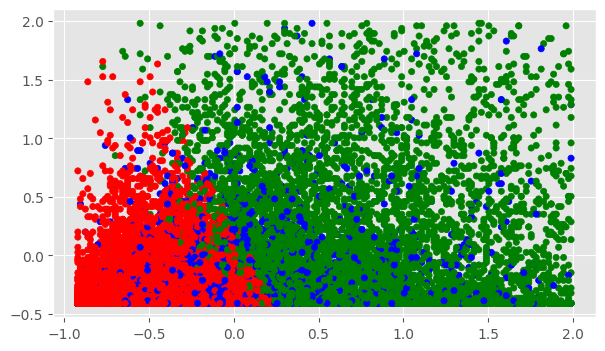

In [36]:
fig = plt.figure()
f1 = dataFrame['trxAtm'].values
f2 = dataFrame['trxPostd'].values

#colores=['red','green','blue','cyan','yellow']
colores=['red','green','blue']
asignar=[]
for row in cluster[2]:     # Es decir para tres clusters
    asignar.append(colores[row])

plt.scatter(f1, f2, c=asignar, s=20)
#plt.scatter(centroide[2][:, 0], centroide[2][:, 1], marker='*', c='yellow', s=100)
plt.show()

#### 3.7 Evaluación

In [37]:
# Tienne q ver con la distribucion

In [38]:
numClus = [4,5,6]

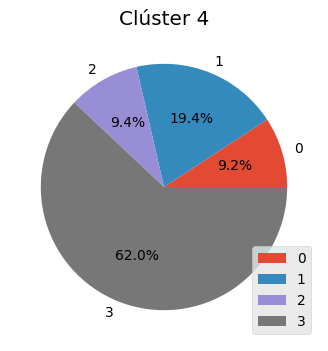

         ctdCliente  pctCliente
cluster                        
0              2856        9.22
1              5996       19.37
2              2908        9.39
3             19200       62.02




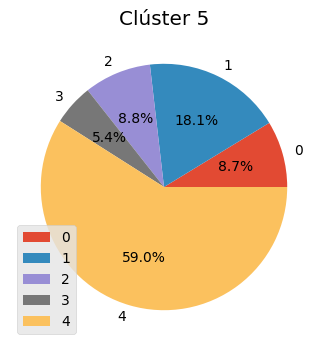

         ctdCliente  pctCliente
cluster                        
0              2698        8.71
1              5609       18.12
2              2726        8.80
3              1662        5.37
4             18265       59.00




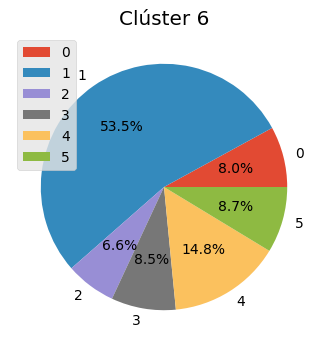

         ctdCliente  pctCliente
cluster                        
0              2464        7.96
1             16565       53.50
2              2044        6.60
3              2623        8.47
4              4580       14.79
5              2684        8.67




In [39]:
centroide = [kmeans[i].cluster_centers_ for i in range(len(kmeans))]
copy =  pd.DataFrame()

for i in numClus:
    # Distribución de los grupos por clúster:
    copy['cluster'] = cluster[i-1]
    cantidadGrupo =  pd.DataFrame()
    cantidadGrupo['ctdCliente']=copy.groupby('cluster').size()
    cantidadGrupo['pctCliente']=round(100*cantidadGrupo['ctdCliente']/cantidadGrupo['ctdCliente'].sum(),2)

    # gráfico de los grupos según su distribución:
    plt.pie(cantidadGrupo['pctCliente'], labels=cantidadGrupo.index, autopct='%1.1f%%')
    plt.title('Clúster '+str(i))
    plt.legend()
    plt.show()
    print(cantidadGrupo)
    print('\n')

In [40]:
# Lo ideal es tomar el que tenga mas cortes, pero siempre viendo la distribucion (> 8%)

In [41]:
numClusFinal = int(input('Ingrese el número de clúster: '))

Ingrese el número de clúster: 8


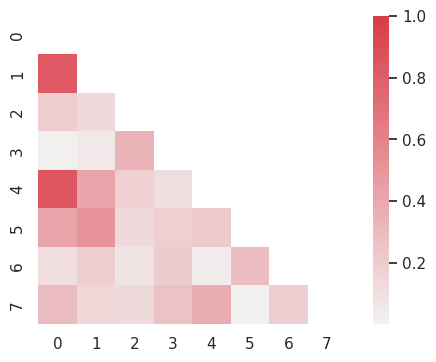

In [43]:
dfTransp = pd.DataFrame(centroide[numClusFinal-1],columns=channelName).T
corr = dfTransp.corr()

def plot_correlations(corr):
    sns.set(style="white")
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(abs(corr), mask=mask, cmap=cmap, vmax=1, center=0,square=True)

plot_correlations(corr)

In [44]:
# El cluster 0 esta medianamente relacionado con el cluster 2